In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# loading the dtaset

df = pd.read_csv('academicdata.csv')

In [3]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
numeric_data = df.select_dtypes(include=['float','int'])

In [6]:
numeric_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [7]:
numeric_data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


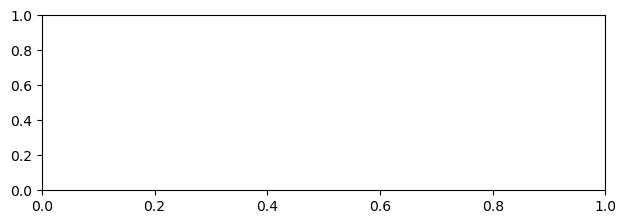

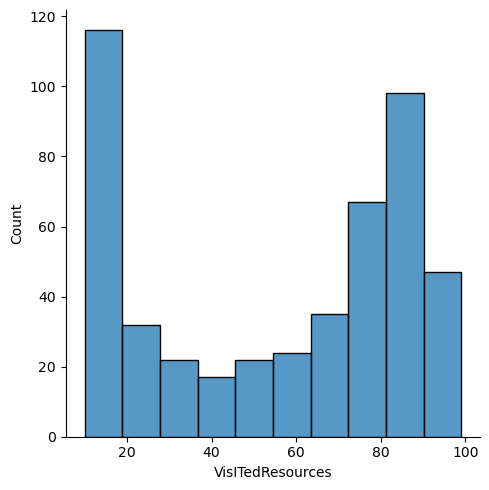

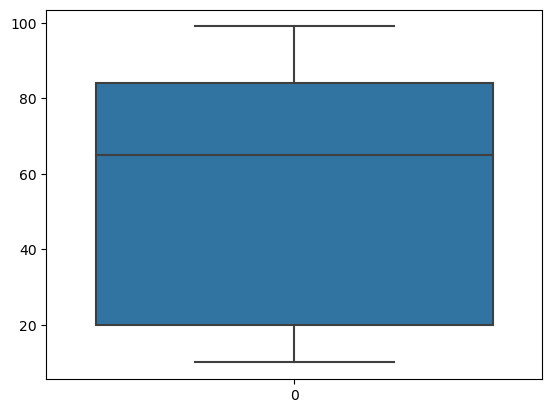

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.displot(numeric_data['VisITedResources'])
plt.tight_layout()
plt.show()
sns.boxplot(numeric_data['VisITedResources'])

plt.show()

In [19]:
Q1 = df.VisITedResources.quantile(0.25)
Q1

20.0

In [10]:
Q3 = df.VisITedResources.quantile(0.75)
Q3

84.0

In [11]:
IQR = Q3 - Q1
IQR

64.0

In [12]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(lower_limit,upper_limit )

-76.0 180.0


In [13]:
numeric_data[(numeric_data['VisITedResources'] < 10 ) ]


,raisedhands,VisITedResources,AnnouncementsView,Discussion
2,10,7,0,30
11,19,6,19,12
12,5,1,0,11
23,2,0,2,50
24,0,2,3,70
...,...,...,...,...
429,11,2,9,49
468,15,9,14,80
469,9,6,15,85
474,2,7,4,8


In [14]:
# Hndling the outliers
# Capping or flooring:

numeric_data['VisITedResources'] = np.where(numeric_data['VisITedResources']<10,10,numeric_data['VisITedResources'])

numeric_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,10,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,10,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [15]:
numeric_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,10,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,10,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


### Apply data transformations on at least one of the variables. The purpose of this 
### transformation should be one of the following reasons: to change the scale for better
### understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
### the skewness and convert the distribution into a normal distribution.